In [21]:
# from ..tests.test_bidiag_JVP_and_VJP_jax import bidiagonalize_vjpable
import jax
import jax.numpy as jnp
from jax import jit
from jax.experimental.ode import odeint
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import Image
from pendulum_utils import (
    simulate_double_pendulum,
    save_and_display_animation,
    plot_pendulum_state,
)

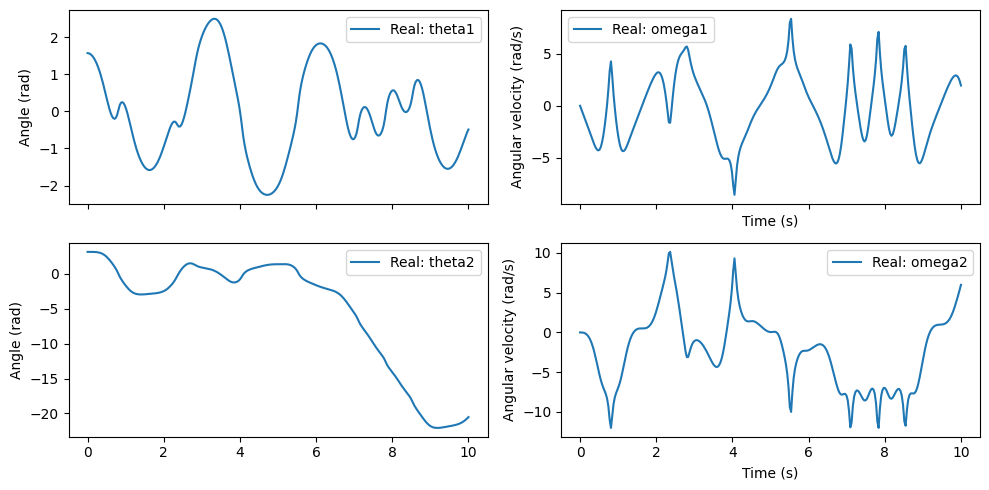

In [22]:
# Parameters and simulation
params = (1.0, 1.0, 1.0, 1.0, 9.81)  # masses, lengths, gravity
initial_state = jnp.array([jnp.pi / 2, 0.0, jnp.pi, 0.0])
target_state = jnp.array([jnp.pi / 2, 1.0, jnp.pi, 0.0])
fps = 1 / 0.03355705
seconds = 10.0
t = jnp.linspace(0.0, seconds, int(fps * seconds))

trajectory = simulate_double_pendulum(initial_state, t, params)

axs = plot_pendulum_state(trajectory, t, "Real")

# save_and_display_animation(trajectory, fps, "real_pendulum")

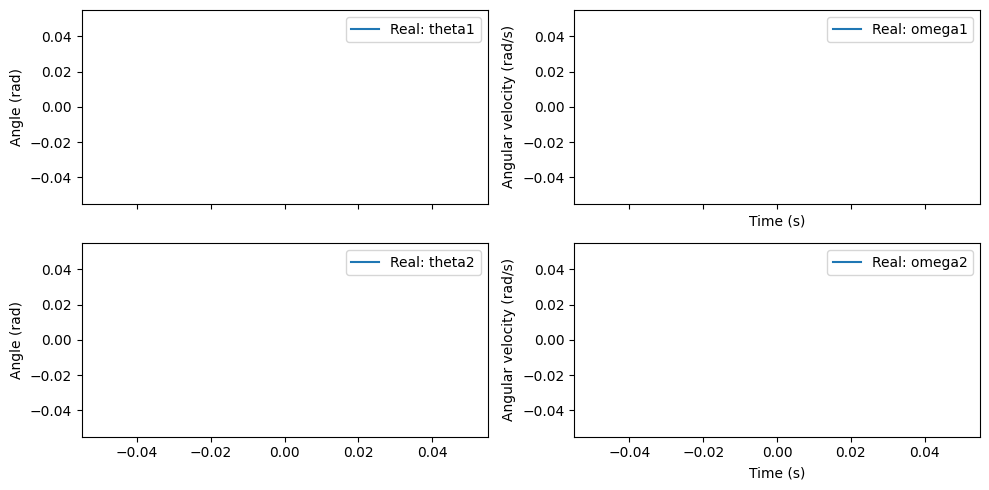

In [23]:
def loss(traj) -> float:
    last = traj[-1]
    return jnp.linalg.norm(last - target_state), traj


val_grad = jax.value_and_grad(
    lambda init, t, params: loss(simulate_double_pendulum(init, t, params)),
    argnums=0,
    has_aux=True,
)


_state = initial_state

for i in range(3):
    (loss_, traj), grad = val_grad(_state, t, params)
    _state -= grad
axs = plot_pendulum_state(traj, t, "Real")
